# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "citiesoutput.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

citycount = 1
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxtemp = []
wind = []


print('Beginning Data Retrieval')
print('---------------------------------------')
for city in cities:
    try:
        query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + city
        cityresponse = requests.get(query_url)
        cityjson = cityresponse.json()
        cityname.append(cityjson['name'])
        cloudiness.append(cityjson['clouds']['all'])
        country.append(cityjson['sys']['country'])
        date.append(cityjson['dt'])
        humidity.append(cityjson['main']['humidity'])
        lat.append(cityjson['coord']['lat'])
        lng.append(cityjson['coord']['lon'])
        maxtemp.append(cityjson['main']['temp_max'])
        wind.append(cityjson['wind']['speed'])
        print(f'{city} which is city number {citycount}')
        citycount = citycount + 1
        
        
    except KeyError:
        print(f'there is missing data for {city}, city number {citycount}')
        citycount = citycount + 1
        
print('-----------------------------')
print('Data Retrieval Complete')     

        

Beginning Data Retrieval
---------------------------------------
wufeng which is city number 1
punta arenas which is city number 2
yellowknife which is city number 3
bethel which is city number 4
labytnangi which is city number 5
mataura which is city number 6
there is missing data for saleaula, city number 7
gat which is city number 8
geraldton which is city number 9
barrow which is city number 10
there is missing data for taolanaro, city number 11
rikitea which is city number 12
ardmore which is city number 13
puerto ayora which is city number 14
saint-philippe which is city number 15
bilma which is city number 16
carnarvon which is city number 17
lebu which is city number 18
zhigansk which is city number 19
atuona which is city number 20
lodhikheda which is city number 21
there is missing data for barentsburg, city number 22
there is missing data for illoqqortoormiut, city number 23
san policarpo which is city number 24
klaksvik which is city number 25
houma which is city number 26


khatanga which is city number 228
eyrarbakki which is city number 229
minot which is city number 230
nyurba which is city number 231
there is missing data for viligili, city number 232
there is missing data for buqayq, city number 233
vostok which is city number 234
chulym which is city number 235
fairbanks which is city number 236
suleja which is city number 237
cabo san lucas which is city number 238
birao which is city number 239
katobu which is city number 240
fortuna which is city number 241
kapaa which is city number 242
there is missing data for bengkulu, city number 243
ust-nera which is city number 244
tanout which is city number 245
roald which is city number 246
luderitz which is city number 247
nanortalik which is city number 248
mayumba which is city number 249
abnub which is city number 250
there is missing data for tumannyy, city number 251
zaria which is city number 252
there is missing data for phan rang, city number 253
dunedin which is city number 254
eskisehir which

shubarkuduk which is city number 452
sobolevo which is city number 453
saint-ambroise which is city number 454
aswan which is city number 455
leku which is city number 456
boca do acre which is city number 457
kuala lumpur which is city number 458
hambantota which is city number 459
bitung which is city number 460
jiazi which is city number 461
zyryanka which is city number 462
vancouver which is city number 463
peniche which is city number 464
evensk which is city number 465
there is missing data for bjala, city number 466
rebrikha which is city number 467
los llanos de aridane which is city number 468
jiuquan which is city number 469
there is missing data for ngukurr, city number 470
kavieng which is city number 471
acapulco which is city number 472
khor which is city number 473
honjo which is city number 474
there is missing data for karaul, city number 475
talas which is city number 476
there is missing data for kegayli, city number 477
ostersund which is city number 478
oktyabrski

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df = pd.DataFrame({'City': cityname,
                       'Cloudiness': cloudiness,
                       'Country': country,
                       'Date': date,
                       'Humidity': humidity,
                       'Latitude': lat,
                       'Longitude': lng,
                       'Max Temperature': maxtemp,
                       'Wind Speed': wind})
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Wufeng,100,CN,1563145306,94,27.44,104.87,61.78,1.86
1,Punta Arenas,75,CL,1563144935,93,-53.16,-70.91,35.60,2.24
2,Yellowknife,40,CA,1563144916,35,62.45,-114.38,71.60,6.93
3,Bethel,75,US,1563144944,60,60.79,-161.76,68.00,5.46
4,Labytnangi,81,RU,1563145306,84,66.66,66.39,57.46,6.26


In [5]:
pd.DataFrame.to_csv(city_df, 'citiesoutput.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

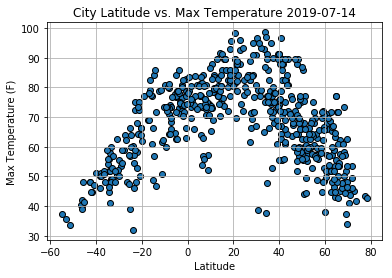

In [11]:
from datetime import date

plt.scatter(city_df['Latitude'], city_df['Max Temperature'], edgecolor='black')

plt.title(f'City Latitude vs. Max Temperature {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()


plt.savefig('latvmaxtemp.png')

#### Latitude vs. Humidity Plot

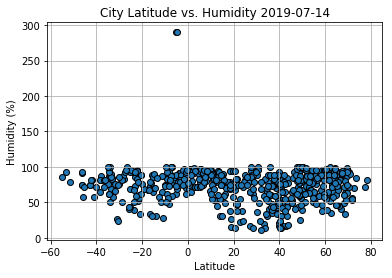

In [12]:
plt.scatter(city_df['Latitude'], city_df['Humidity'], edgecolor='black')

plt.title(f'City Latitude vs. Humidity {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

plt.savefig('latvhumidity.png')

# Latitude vs. Cloudiness Plot

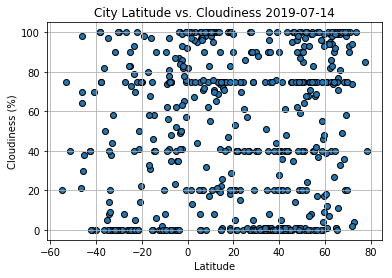

In [13]:
plt.scatter(city_df['Latitude'], city_df['Cloudiness'], edgecolor='black')

plt.title(f'City Latitude vs. Cloudiness {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

plt.savefig('latvclouds.png')

#### Latitude vs. Wind Speed Plot

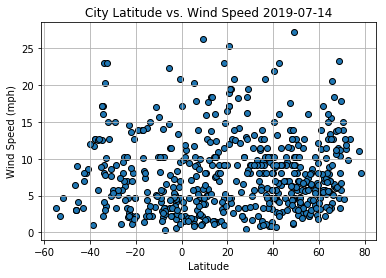

In [14]:
plt.scatter(city_df['Latitude'], city_df['Wind Speed'], edgecolor='black')

plt.title(f'City Latitude vs. Wind Speed {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

plt.savefig('latvwind.png')

In [ ]:
Observations:
    
1. The Latitude vs. Humidity plot is showing in error in the source data. Humidty can not be over 100%. Otherwise, 
   you can see there little correlation between humidity and latitude
2. There is definite correlation between temp and latitude. Cities between 20 and 40 degrees latitude 
   had the highest max temperature.
3. There is no correlation between latitude and cloudiness.